# Advanced Object Detection with YOLOv8

This notebook demonstrates the expanded features of our object detection project. It covers:
- Image detection with visualization.
- Video detection with basic object tracking.
- Launching a Gradio interface for interactive inference.
- An overview of the REST API endpoint (see `api.py`).

In [ ]:
!pip install ultralytics opencv-python matplotlib gradio==4.44.1 fastapi uvicorn

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
print('Updated sys.path:', sys.path)

Updated sys.path: ['C:\\Users\\moham\\Desktop\\personal-repos\\advanced-object-detection-yolov8\\notebooks', 'c:\\users\\moham\\appdata\\local\\programs\\python\\python39\\python39.zip', 'c:\\users\\moham\\appdata\\local\\programs\\python\\python39\\DLLs', 'c:\\users\\moham\\appdata\\local\\programs\\python\\python39\\lib', 'c:\\users\\moham\\appdata\\local\\programs\\python\\python39', '', 'C:\\Users\\moham\\AppData\\Roaming\\Python\\Python39\\site-packages', 'c:\\users\\moham\\appdata\\local\\programs\\python\\python39\\lib\\site-packages', 'c:\\users\\moham\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\antlr_python_runtime-3.1.3-py3.9.egg', 'c:\\users\\moham\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\paddleseg-2.9.0-py3.9.egg', 'c:\\users\\moham\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\prettytable-3.10.0-py3.9.egg', 'c:\\users\\moham\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\opencv_python-4.5.5.6

## Image Detection


image 1/1 C:\Users\moham\Desktop\personal-repos\advanced-object-detection-yolov8\notebooks\..\data\sample.jpg: 384x640 2 horses, 99.0ms
Speed: 2.2ms preprocess, 99.0ms inference, 254.1ms postprocess per image at shape (1, 3, 384, 640)


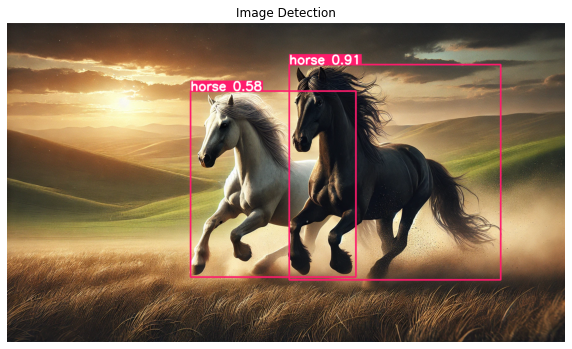

In [2]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
image_path = '../data/sample.jpg'  # Replace with your image path
results = model(image_path)
annotated_img = results[0].plot()
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.title('Image Detection')
plt.axis('off')
plt.show()

## Video Detection with Tracking


image 1/1 C:\Users\moham\Desktop\personal-repos\advanced-object-detection-yolov8\notebooks\temp_frame.jpg: 640x384 1 bench, 1 cat, 92.8ms
Speed: 2.5ms preprocess, 92.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


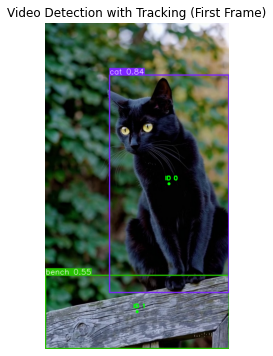

In [3]:
import os
import cv2
from ultralytics import YOLO
from tracking import CentroidTracker

model = YOLO('yolov8n.pt')
video_path = '../data/sample_video.mp4'  # Replace with your video path

cap = cv2.VideoCapture(video_path)
tracker = CentroidTracker(max_disappeared=30)
ret, frame = cap.read()
if ret:
    temp_img = 'temp_frame.jpg'
    cv2.imwrite(temp_img, frame)
    results = model(temp_img)
    boxes = []
    if results[0].boxes is not None:
        for box in results[0].boxes.xyxy.cpu().numpy():
            boxes.append(box.astype(int).tolist())
    objects = tracker.update(boxes)
    annotated_frame = results[0].plot()
    # Annotate tracking IDs
    for (objectID, centroid) in objects.items():
        text = f"ID {objectID}"
        cv2.putText(annotated_frame, text, (centroid[0] - 10, centroid[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.circle(annotated_frame, (centroid[0], centroid[1]), 4, (0, 255, 0), -1)
    
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
    plt.title('Video Detection with Tracking (First Frame)')
    plt.axis('off')
    plt.show()
    os.remove(temp_img)
else:
    print('Failed to read video file.')
cap.release()

## Launch Gradio Interface

The following cell launches a Gradio interface for interactive detection on uploaded images or videos.

In [4]:
from detect import gradio_interface
gradio_interface(model)

Running on local URL:  http://0.0.0.0:7860

To create a public link, set `share=True` in `launch()`.



image 1/1 C:\Users\moham\AppData\Local\Temp\gradio\55bae3671638f8eb71b97348e712b0b02fae51cc46fedd321f85b15f0fc543ca\sample.jpeg: 384x640 2 horses, 119.5ms
Speed: 21.9ms preprocess, 119.5ms inference, 232.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\moham\AppData\Local\Temp\gradio\55bae3671638f8eb71b97348e712b0b02fae51cc46fedd321f85b15f0fc543ca\sample.jpeg: 384x640 2 horses, 88.0ms
Speed: 3.1ms preprocess, 88.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


## REST API Overview

The REST API server (see `api.py`) accepts image uploads and returns detection results in JSON format. To test the API, run the server:
```bash
uvicorn api:app --host 0.0.0.0 --port 8000
```
and send a POST request with an image to the `/detect` endpoint.

## Conclusion

This notebook demonstrates an advanced object detection pipeline using YOLOv8. The project now supports:
- Image detection with visualization
- Video detection with object tracking
- Real-time detection using a Gradio interface
- A REST API for serving detection results

These enhancements showcase a robust computer vision system that can be deployed in various scenarios.